# Learning module: Parsing strategies

Parsing is an essential part of bioinformatics. There are many different file formats in bioinformatics and also many options for data structures to store the data in. In this module, you will practice different parsing skills using the same data from your assignment ("`files/P3_argonaut.gb`").

To follow the learning module, read and execute the code and instructions for each section in order using Shift + Enter.

## 1.    Parse a text file and store each element in a convenient data structure
The first step will be to open and read the file. Then, you will test how different parsing strategies can help you retrieve data, and how different data structures can help you store it.

### 1.1.    Why can't the computer just open and read the file?
You can open any text file with the built-in `open()` function. 

Opening a file allows you to: 
- "read it" (visualizing it, with the `'r'` argument passed on to the `open()` function), or
- "write it" (modifying it, with `'w'` passed as an argument),

but either way no data is actually imported to your environment as a variable. For that purpose, you will need to `read` the lines of the file you just opened, and store them in a suitable data structure.

See below a way to get a string containing the data from the file, stored under the `/files` directory:


In [ ]:
path = 'files/P3_argonaut.gb'
with open(path, 'r') as f:
        data = f.read()

print(data[0:1000]) # Print a few characters of the string
print(type(data))

The method used above (`f.read()`) returns the bytes from the file `f` as a string variable that is legible to you, but still useless for the analyses. Discuss why with your partner(s).

### 1.2.    Defining the problem
The strategy used to parse any text file should aim to convert its *data format* (how information is displayed to you in the file) into the adequate *data structures* (the logical units that the computer can use).

The format of the file you will be working with is *.gb* (GenBank Flat File). Open the [Sample GenBank Record](https://www.ncbi.nlm.nih.gov/genbank/samplerecord/) for a detailed description of each field in a *.gb* file. 

Discuss with your partner:
- Which fields are relevant to the analyses? 
- How are fields structured? 
- Which characters delimit these fields in the text?

<img src="files/gb.png">

Out of all records in a *.gb* file, only these are relevant for the assignment:
1.  Accession number
2.  Organism name
3.  Sequence length
4.  Sequence (used also for %GC calculations)

Notice that the sample *.gb* file contains a single GenBank record, while your assignment file contains several records, all with their accession numbers. This means that you could take an approach for your assignment where the GenBank data is first split at each record, and each record is then individually parsed for its fields.

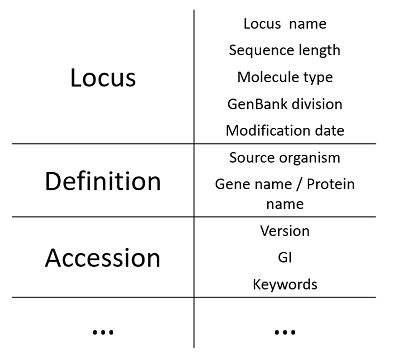

## Fill in the blanks: using different methods to parse a GenBank Flat file.

### A) `split()` strategy to retrieve GenBank records separately.

A straight-forward (but not infallible) method to retrieve each record separately could to open and read the file as a string, and then split it at the points where each record begins or ends. 

Inspect the text file and assign a value to the `start` and `end` variables below. These are, respectively, the patterns (repeating series of characters) immediately preceding or succeeding each individual GB record.


<img src ="files/startend.png">

The next step is to extract all records into a list. You will test 2 different approaches: `split()` at the `end` or at the `start` of each entry.

Fill in the blanks in the box below as indicated. Check the different outputs and discuss with your partner(s) the differences in output between splitting the string with `start` and with `end`. How many records are really there? Which method(s) give(s) a wrong output, and how can you fix it?

In [ ]:
start = "" # Fill in the blank
end = "" # Fill in the blank

In [ ]:
# Open the file:
with open(path, 'r') as f:
    data = f.read()

# split method
records = data.split( ) # Fill in the blank with either start or end.


print("Length of the list:", len(records), " records")
print(records[]) # Fill in the blank with some index, from 0 to the total number of records. 

# Try 0 first, then the last one.


If you have encountered some issues, like blank list records, you can use list comprehension to remove them from the list. Fill in the blanks below.

In [ ]:
# Remove empty records using list comprehension:
records = [ for  in  if  != ""] # Fill in the blanks at the end.
print("Updated length of the list:", len(records), " records \n") # See how the list has changed

print(records[0])

You could have used many different strategies to read the `P3_argonaut.gb` file and store each accession separately. When you write a parser script, you should aim to make it as flexible as possible to be able to handle data errors and formatting differences, even among files in the same data format.  For that purpose, you will need to think about solutions using different matches, regex expressions, error handling, etc.

### B) Regular expressions, `re` strategy
Now, you will write some code that opens the *.gb* file and reads each `line` separately into a list of `lines`. Then, it has to loop over all lines looking for the pattern for **organisms**. If it finds an organism name, it will store it into an `organisms` list.

To help you understand Regular Expression strategies, the method to retrieve *accession numbers* will be explained before.

#### Retrieving nucleotide accession numbers with regex
The GenBank accession number for a nucleotide is defined as 1 letter + 5 numerals **or** 2 letters + 6 numerals **or** 2 letters + 8 numerals. This means [accession numbers for nucleotides](https://community.gep.wustl.edu/repository/course_materials_WU/annotation/Genbank_Accessions.pdf) are: (1 or 2 letters) + "_" + (5, 6 or 8 numerals).

This regular expression would capture all (nucleotide) GenBank accession numbers: `([A-Z]{1,2}_[0-9]+)`. Broken down:
-   `[A-Z]{1,2}` 1 or 2 capital letters
-   `_[0-9]+` an underscore and more than 1 digit.

Moreover, accession numbers seem to be indicated like this:

<img src ="files/accession_sample.png">

With *ACCESSION* and three white spaces preceding the number. This means you can also input this in the regex expression before our pattern: `(?<=ACCESSION   )`, to indicate that this pattern precedes our match. The final regular expression for nucleotide accession numbers will be: `'(?<=ACCESSION   )([A-Z]{1,2}_[0-9]+)'`

In [ ]:
# Retrieving accession numbers
import re
with open(path, 'r') as f:
    lines = f.readlines() # Creates a list of lines
    accessions = [] # Empty list to store all accession numbers
    for line in lines:
        accession= re.findall(r'(?<=ACCESSION   )([A-Z]{1,2}_[0-9]+)', line) # Attempts to match accession numbers. Returns a list of 1 match.
        if accession:
            accessions.append(accession[0]) # Appends to the list the found accession number as a string. 
            
print("Number of accessions:", len(accessions), "\n", accessions) # Print the number of and the accessions collected




This confirms that there are 7 records in the file. 

Now, can you come up a similar strategy to match all *ORGANISM* names and store them in a list? 

<img src ="files/organism_sample.png">

In [ ]:
# Retrieving organism names

with open(path, 'r') as f:
    lines = f.readlines() # Creates a list of lines
    organisms = [] # Empty list to store all accession numbers
    for line in lines:
        organism= re.findall(r'(?<=ORGANISM  )([a-zA-Z]+ [a-z]+)', line) # Attempts to match accession numbers.
        if organism:
            organisms.append(organism[0]) # Append the result
            
print("Number of accessions:", len(organisms), "\n", organisms) # Print the number of and the accessions collected








### 1.2.    Selecting a data structure type
Discuss with your partner(s) which of the data structures below seem to better capture the structure of the data in a *.gb* file (and for your assignment).
- A)    **A list or set** containing a *string* for each record. Each item in the list is an array of all characters in a GenBank record. 
- B)    **A list of lists or tuples**, where each item in the list is an ordered list or tuple with all relevant data.
- C)    **A dictionary of lists**, where each key corresponds with a list of lists or tuples with all relevant data.
- D)    **A dictionary of dictionaries (nested dictionary)**, where each dictionary key is an record and each value is a dictionary of the fields of that record.


<img src="files/structures.png">


In a *.gb* file and for the purpose of your assignment, the data in each record presents a relationship of one (the Accession Number) to many (the rest of relevant fields). For this reason, the best approaches would be either **C** or **D**, where the accession number (dictionary key) is paired with its items (dictionary values). For the purpose of this exercise, D is too redundant and a flatter structure like **C** might improve code readability.
 
 #### Fill in the gaps: creating a dictionary of dictionaries
The code below should loop over the list of `records`, and for each record:
-   Retrieve the `accession` name, `length` and `organism`
-   Create an accession dictionary: `accession_dict = {"Organism": organism, "Length": length}`
-   Populate the dictionary `gb_dict` with this dictionary. This would be a reduced version of structure **D)** described above.

In [ ]:
# Creating a dictionary
gb_dict = {} # Empty dictionary of dictionaries
for record in records:
    record_dict = {}  # Create dictionary for every single record
    organism =                                                  # Retrieve organism name
    accession =                                                 # Retrieve accession number
    length =                                                    # Retrieve record sequence length in bp
    accession_dict =                                            # Create the dictionary of 'Organism' and 'Length' for this accession
    gb_dict[        ] =                                         # Populate the gb_dictionary with this nested dictionary


print(gb_dict)



# Prepare for the assignment

Now define 2 functions. Remember to use multi-line docstrings to document the usage and parameters of each function.
- A function that opens and reads the *.gb* file from its `path` and stores each record in a list of `records`.

In [ ]:
def record_finder(path):
    """
    """
    return records

- A function that uses the list from the previous function as input and creates a dictionary with each accession number as a key and Organism and Length either as a list or a dictionary within a dictionary (examples C and D, respectively)

In [ ]:
def extract_fields(records)